In [294]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import random
from scipy import ndimage

In [295]:
path = 'C:/Users/Sizov/Downloads/nails_segmentation/'
path_images = os.path.join(path,'images')
path_labels = os.path.join(path,'labels')
images = os.listdir(path_images)
labels = os.listdir(path_labels)
if np.size(images)!= np.size(labels):
    print('error in input dataset')
else:
    pairs = [[images[i], labels[i]] for i in range(np.size(images))]

In [296]:
def rotation(pair,angle):
    print("rotation at angle ",angle)
    pair[0] = ndimage.rotate(pair[0], angle) 
    pair[1] = ndimage.rotate(pair[1], angle)
    return pair
    

def crop(pair):
    x1 = random.randrange(0,np.shape(pair[0])[0] - 100)
    x2 = x1 + random.randrange(50,np.shape(pair[0])[0] - x1 + 100)
    y1 = random.randrange(0,np.shape(pair[0])[1] - 100)
    y2 = y1 + random.randrange(50,np.shape(pair[0])[1] - y1 + 100)
    print('Cropping for size: ', (x1,x2), ',',(y1,y2))
    pair[0] = (pair[0])[x1:x2, y1:y2]
    pair[1] = (pair[1])[x1:x2, y1:y2]
    return pair

def blur(pair):
    kernel = (random.randint(0,20), random.randint(0,10))
    print('Blurring with kernel sizes: ', kernel)
    pair[0] = cv2.blur(pair[0], kernel)
    pair[1] = cv2.blur(pair[1], kernel)
    return pair

def flip(pair):
    flip = random.randint(-1,1)
    print('Reflection at direction', flip)
    pair[0] = cv2.flip(pair[0], flip)
    pair[1] = cv2.flip(pair[1], flip)
    return pair
    
def augmentations(pair, type):
    cases = {
        '1': lambda pair: rotation(pair, random.randrange(0,360)),
        '2': lambda pair: crop(pair),
        '3': lambda pair: blur(pair),
        '4': lambda pair: flip(pair)
    }
    result = cases[str(type)]
    return result(pair)
    

In [297]:
def nails_iterator(number, augmentation):
    random.shuffle(pairs)
    size = (200, 200)
    for i in range(number):
        image = cv2.cvtColor(cv2.imread(os.path.join(path_images,(pairs[i])[0])),cv2.COLOR_BGR2RGB)
        mask = cv2.imread(os.path.join(path_labels,(pairs[i])[1]))
        if augmentation:
            [image, mask] = augmentations([image, mask], random.randint(1,4))
        image = cv2.resize(image, size)
        mask = cv2.resize(mask, size)
        yield [image, mask]

Cropping for size:  (71, 308) , (8, 279)


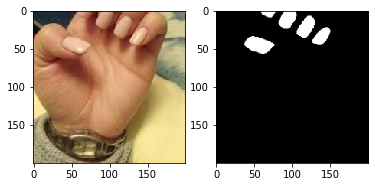

rotation at angle  244


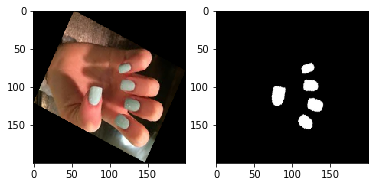

Blurring with kernel sizes:  (10, 1)


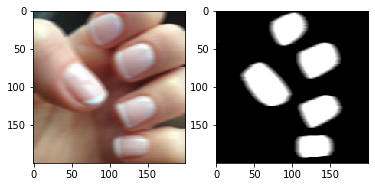

In [298]:
nails_base = nails_iterator(3,True)
for pair in nails_base:
    f,ax = plt.subplots(1,2)
    ax[0].imshow(pair[0])
    ax[1].imshow(pair[1])
    plt.show()